In [5]:
from FundamentalIndicators import get_FI_for_analysis
from LoadData import stock_price
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Company = 'XOM'
df = stock_price(Company, "1992-12-31", "2018-12-31")

df = get_FI_for_analysis(df)

In [6]:
def heatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, rotation=45)
    plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, rotation=45)
    plt.show()

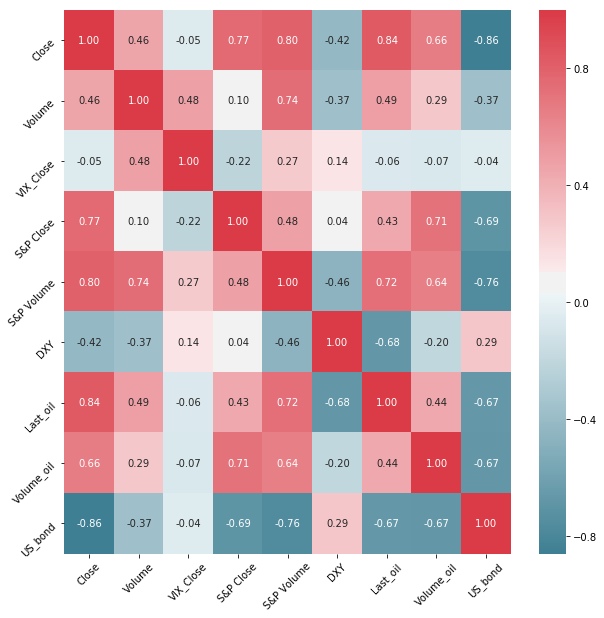

In [7]:
heatMap(df)

In [ ]:
from LoadData import stock_price
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
    
Company='XOM'
df=stock_price(Company, "1992-12-31", "2018-12-31")

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.index, df.Close, label='{} stock'.format(Company))
plt.vlines(df.index[int(len(df)*0.85)], 0, 170, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: {} stock price'.format(Company))
plt.legend()
plt.show()

Company='^VIX'
VIX=stock_price(Company, "1992-12-31", "2018-12-31")
VIX.rename(columns={'Close':'VIX_Close'}, inplace=True)
df=df.join(VIX.VIX_Close)

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.index, df.VIX_Close)
plt.xlabel('Date')
plt.title('Figure 2: VIX Index')
plt.legend()
plt.show()

Company='^GSPC'
SnP=stock_price(Company, "1960-12-31", "2018-12-31")
SnP.rename(columns={'Close':'S&P Close', 'Volume':'S&P Volume'}, inplace=True)
df=df.join(SnP.loc[:,['S&P Close', 'S&P Volume']])

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(SnP.index, SnP['S&P Close'], label='S&P index')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 3: S&P index')
plt.legend()
plt.show()

DXY1981=pd.read_csv('../Final/Data/DXY1981.csv')
DXY=pd.read_csv('../Final/Data/DXY.csv')
DXY=pd.concat([DXY1981, DXY]).drop_duplicates('Date').reset_index(drop=True)
DXY.Date = pd.to_datetime(DXY.Date)
DXY=DXY.set_index('Date')
DXY.rename(columns={'Price':'DXY'}, inplace=True)
DXY.sort_index

df=df.join(DXY.DXY)

# Import from Quandl WTI crude oil price data
url = "https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv"
wticl1 = pd.read_csv(url, index_col=0, parse_dates=True)
wticl1.sort_index(inplace=True)
wticl1_last = wticl1['Last']
# wticl1['PctCh'] = wticl1.Last.pct_change()
names=[]
for i in wticl1.columns:
    names+=[i+'_oil']
wticl1.columns=names
# wticl1=wticl1.loc[:,['Last_oil','Volume_oil','PctCh_oil']]
wticl1=wticl1.loc[:,['Last_oil','Volume_oil']]
df=df.join(wticl1)

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.index, df.Last_oil, label='Oil prices')
# plt.vlines(datetime.date(2016,4, 20), 0, 170, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 3: Oil price')
plt.legend()
plt.show()

US_bond1981=pd.read_csv('../Final/Data/USA_10Y_bong_1981.csv')
US_bond=pd.read_csv('../Final/Data/USA_10Y_bong.csv')
US_bond=pd.concat([US_bond1981, US_bond]).drop_duplicates('Date').reset_index(drop=True)
US_bond.Date = pd.to_datetime(US_bond.Date)
US_bond=US_bond.set_index('Date')
US_bond.rename(columns={'Price':'US_bond'}, inplace=True)
US_bond.sort_index
df=df.join(US_bond.US_bond)

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.index, df.US_bond, label='US 10 Year bond rate')
# plt.vlines(datetime.date(2016,4, 20), 0, 170, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('Figure 4:US 10 Year bond rate')
plt.legend()
plt.show()

df.drop(['High', 'Low', 'Open', 'Adj Close'], axis=1, inplace=True)
heatMap(df)

### Fundamental analysis